In [18]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import string
billboard_csv = '../Resources/billboard_lyrics_1964-2015.csv'
song_list_csv = '../Resources/song_info.csv'

In [19]:
# set dataframes from csv files
billboard_df = pd.read_csv(billboard_csv, encoding = 'ISO-8859-1')
billboard_df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [20]:
song_df = pd.read_csv(song_list_csv)
song_df.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [21]:
# add columns to both dfs with lowercase song names
billboard_df['fuzzy_name'] = billboard_df['Song'].apply(lambda x: x.lower())
song_df['fuzzy_name'] = song_df['song_name'].apply(lambda x: x.lower())

In [22]:
# remove punctuation from lowercase names
trans_table = str.maketrans('','',string.punctuation)
billboard_df['fuzzy_name'] = billboard_df['fuzzy_name'].apply(lambda x: x.translate(trans_table))
song_df['fuzzy_name'] = song_df['fuzzy_name'].apply(lambda x: x.translate(trans_table))

In [23]:
# used song_df.tail as verification to see song # 18832 which has parentheses removed
song_df.tail(10)

,song_name,artist_name,album_names,playlist,fuzzy_name
18825,Something Familiar,Josienne Clarke and Ben Walker,Overnight,Your Favorite Coffeehouse,something familiar
18826,Call It Dreaming,Iron & Wine,Beast Epic,Your Favorite Coffeehouse,call it dreaming
18827,Stay Awake,Joseph,Stay Awake,Your Favorite Coffeehouse,stay awake
18828,Build Me Up From Bones,Sarah Jarosz,Build Me Up From Bones,Your Favorite Coffeehouse,build me up from bones
18829,I Know,Sammy Brue,I Am Nice,Your Favorite Coffeehouse,i know
18830,Let It Breathe,Water Liars,Water Liars,Your Favorite Coffeehouse,let it breathe
18831,Answers,Brooke Annibale,The Simple Fear,Your Favorite Coffeehouse,answers
18832,Sudden Love (Acoustic),The Woodlands,"Parallels, Vol. II",Your Favorite Coffeehouse,sudden love acoustic
18833,Gentle on My Mind,Robert Ellis,Dear John,Your Favorite Coffeehouse,gentle on my mind
18834,Up to Me,Sera Cahoone,Up to Me,Your Favorite Coffeehouse,up to me


In [24]:
# fuzzy testing
query = billboard_df['fuzzy_name'][2]
choices = song_df['fuzzy_name']
# yields only top result
result = process.extractOne(query,choices)
result

('i cant get no satisfaction', 100, 251)

In [25]:
# top 5 results
results = process.extract(query,choices)
results

[('i cant get no satisfaction', 100, 251),
 ('i can', 90, 3751),
 ('satisfaction', 90, 5709),
 ('i can', 90, 9356),
 ('cant stop', 86, 13)]

In [26]:
# double check information
song_df.loc[251]

song_name           (I Can't Get No) Satisfaction
artist_name                    The Rolling Stones
album_names    Hot Rocks (1964-1971) [Remastered]
playlist                         60s Rock Anthems
fuzzy_name             i cant get no satisfaction
Name: 251, dtype: object

In [42]:
# loop through billboard df
query_name = []
matched_name = []
ratio_value = []
song_index = []
fuzzy_list = []
choices = song_df['fuzzy_name']
for i in range(len(billboard_df)):
    query = billboard_df['fuzzy_name'][i]
    query_name.append(billboard_df['fuzzy_name'][i])
    fuzzy_list.append(process.extractOne(query,choices,scorer=fuzz.ratio))

In [43]:
for i in range(len(fuzzy_list)):
    matched_name.append(fuzzy_list[i][0])
    ratio_value.append(fuzzy_list[i][1])
    song_index.append(fuzzy_list[i][2])

In [44]:
fuzzy_dict = {'Song Name':query_name,
             'Matched Name':matched_name,
             'Ratio Value':ratio_value,
             'Song List Index':song_index}
fuzzy_df = pd.DataFrame(fuzzy_dict)

In [45]:
fuzzy_df

,Song Name,Matched Name,Ratio Value,Song List Index
0,wooly bully,only lonely,64,3209
1,i cant help myself sugar pie honey bunch,i cant help myself sugar pie honey bunch,100,3863
2,i cant get no satisfaction,i cant get no satisfaction,100,251
3,you were on my mind,youre on my mind,91,11156
4,youve lost that lovin feelin,youve got the love,70,1959
...,...,...,...,...
5095,el perdon,el perdón,89,10269
5096,she knows,heaven knows,76,10584
5097,night changes,dont change,75,746
5098,back to back,back to back,100,3684


In [31]:
fuzzy_df.to_csv('fuzzy_df.csv')

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


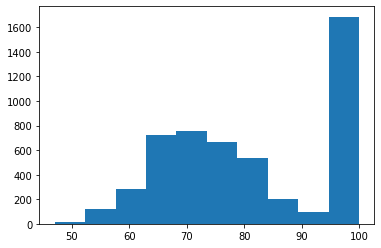

In [36]:
plt.hist(fuzzy_df['Ratio Value'])
plt.show()

In [38]:
# Loop through Billboard dataframe and fuzzy match to list of spotify songs
# Initalize lists to hold query songs as well as the fuzzy mathced songs
query_name = []
fuzzy_list = []
# Set up 'choices' parameter of fuzzywuzzy to tell the module what songs to look through to match our query
choices = song_df['fuzzy_name']
# For loop to loop through billboard songs and fuzzmatch to spotify list
for i in range(len(billboard_df)):
    query = billboard_df['fuzzy_name'][i]
    query_name.append(billboard_df['fuzzy_name'][i])
    # Simple ratio checks for the similarty of the two strings based on some crazy math shit
    if process.extractOne(query,choices,scorer=fuzz.ratio) == 100:
        fuzzy_list.append(process.extractOne(query,choices,scorer=fuzz.ratio))
    # Partial ration looks at the similarty of the strings from the beginning, ie "Every Time We Touch" = "Every Time"
    elif process.extractOne(query,choices,scorer=fuzz.partial_ratio) == 100:
        fuzzy_list.append(process.extractOne(query,choices,scorer=fuzz.partial_ratio))
    # Token sort ratio gives 100 if every word is same, irrespective of the position ie Dog Butt = Butt Dog
    elif process.extractOne(query,choices,scorer=fuzz.token_sort_ratio) == 100:
        fuzzy_list.append(process.extractOne(query,choices,scorer=fuzz.token_sort_ratio))
    # If no matches are perfect above, just take the closest it can find
    else:
        fuzzy_list.append(process.extractOne(query,choices,scorer=fuzz.ratio))

In [40]:
fuzzy_list

[('b', 17),
 ('i', 5),
 ('s', 7),
 ('y', 10),
 ('h', 7),
 ('n', 22),
 ('l', 40),
 ('a', 7),
 ('r', 10),
 ('i', 25),
 ('h', 13),
 ('n', 12),
 ('s', 9),
 ('t', 8),
 ('h', 25),
 ('t', 13),
 ('i', 11),
 ('e', 15),
 ('w', 5),
 ('p', 8),
 ('h', 12),
 ('u', 17),
 ('n', 7),
 ('r', 22),
 ('u', 11),
 ('h', 7),
 ('r', 15),
 ('a', 11),
 ('e', 11),
 ('g', 13),
 ('i', 13),
 ('l', 8),
 ('t', 8),
 ('a', 15),
 ('n', 14),
 ('a', 13),
 ('r', 9),
 ('s', 14),
 ('o', 9),
 ('s', 8),
 ('l', 10),
 ('t', 11),
 ('t', 9),
 ('o', 10),
 ('s', 12),
 ('y', 8),
 ('e', 7),
 ('u', 14),
 ('i', 12),
 ('g', 29),
 ('f', 18),
 ('c', 9),
 ('i', 8),
 ('o', 10),
 ('s', 11),
 ('t', 14),
 ('r', 13),
 ('l', 13),
 ('h', 9),
 ('u', 8),
 ('m', 17),
 ('t', 7),
 ('w', 6),
 ('u', 12),
 ('b', 11),
 ('e', 33),
 ('o', 12),
 ('r', 13),
 ('a', 11),
 ('p', 12),
 ('a', 7),
 ('t', 15),
 ('b', 12),
 ('t', 17),
 ('c', 13),
 ('o', 8),
 ('a', 9),
 ('o', 9),
 ('m', 12),
 ('e', 10),
 ('s', 14),
 ('u', 13),
 ('h', 9),
 ('l', 8),
 ('d', 10),
 ('e', 6),

In [39]:
for i in range(len(fuzzy_list)):
    matched_name.append(fuzzy_list[i][0])
    ratio_value.append(fuzzy_list[i][1])
    song_index.append(fuzzy_list[i][2])

IndexError: tuple index out of range

In [41]:
# loop through billboard df
query_name_p = []
matched_name_p = []
ratio_value_p = []
song_index_p = []
fuzzy_list_p = []
choices_p = song_df['fuzzy_name']
for i in range(len(billboard_df)):
    query_p = billboard_df['fuzzy_name'][i]
    query_name_p.append(billboard_df['fuzzy_name'][i])
    fuzzy_list_p.append(process.extractOne(query_p,choices_p,scorer=fuzz.partial_ratio))

KeyboardInterrupt: 